In [14]:
from polygon import RESTClient

from dotenv import load_dotenv
load_dotenv('/root/.env')
import numpy as np
import os
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [20,10]
sns.set_style("darkgrid")

In [16]:
client = RESTClient(os.environ.get('POLYGON_API_KEY'))

In [28]:
def get_data(ticker, start_date, end_date):
    df = pd.DataFrame(client.list_aggs(ticker,
                                    1,
                                    "day",
                                    start_date,
                                    end_date,
                                    limit=50000))

    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    df = df.rename(columns = {"timestamp": "date"})
    df = df.set_index('date')['close'].rename(ticker)
    return df.map(np.log).diff().fillna(0)

In [29]:
nvo = get_data('NVO', '2023-01-01', '2023-10-14')
lly = get_data('LLY', '2023-01-01', '2023-10-14')
spy = get_data('SPXL', '2022-01-01', '2023-10-14')

In [32]:
mstr = get_data('MSTR', '2023-01-01', '2023-10-14')
gbtc = get_data('GBTC', '2023-01-01', '2023-10-14')

In [7]:
from aaron_research.utils.helpers import plot_cumulative_returns

/root/src/crypto-astraea/aaron_research/utils/helpers.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  return 2 * positions.abs().values.sum() / trades.abs().values.sum()


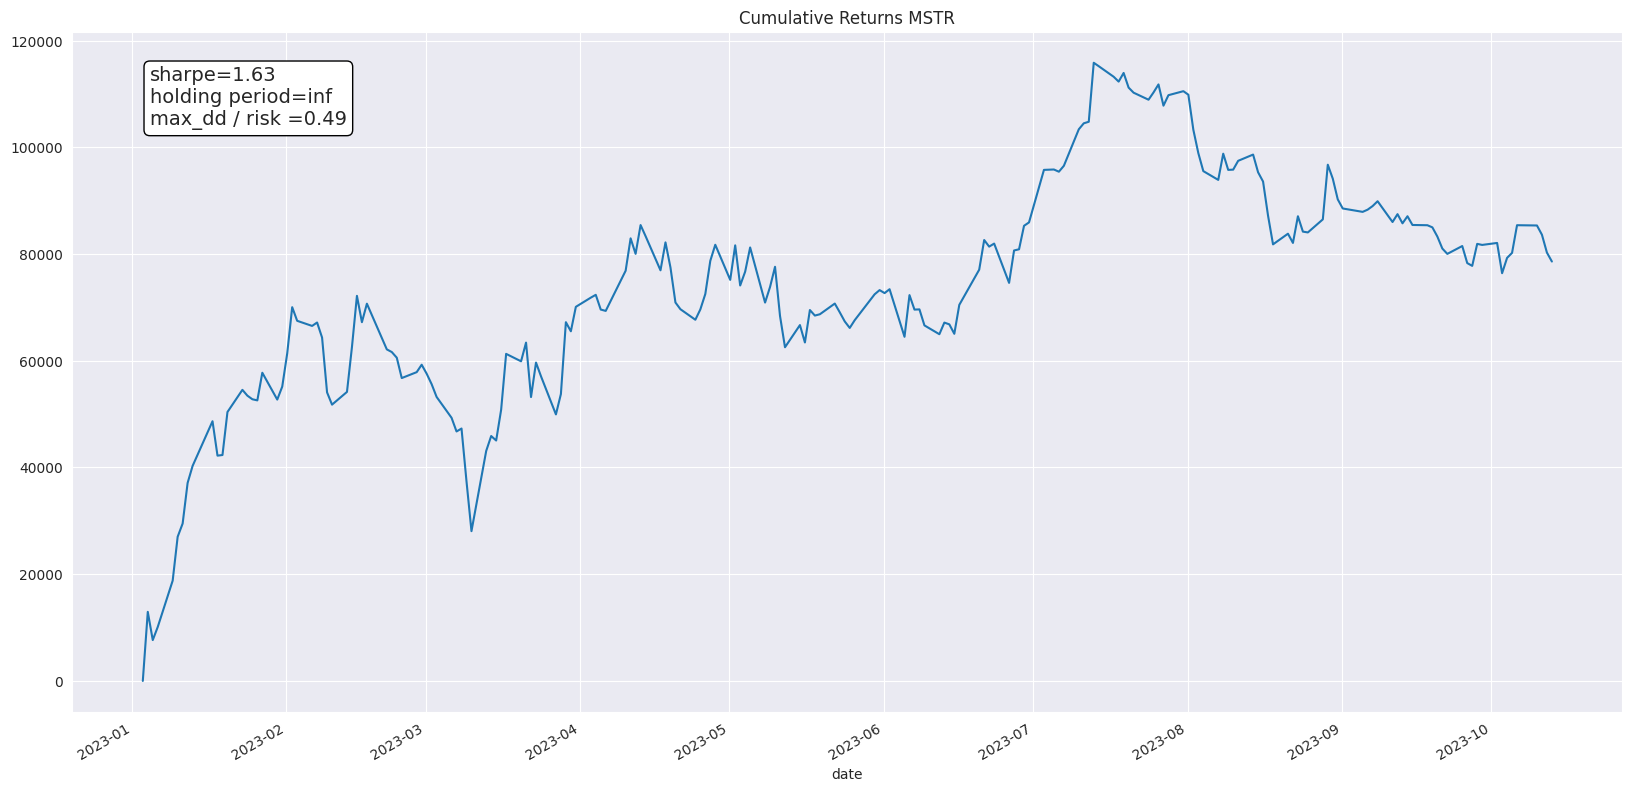

/root/src/crypto-astraea/aaron_research/utils/helpers.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  return 2 * positions.abs().values.sum() / trades.abs().values.sum()


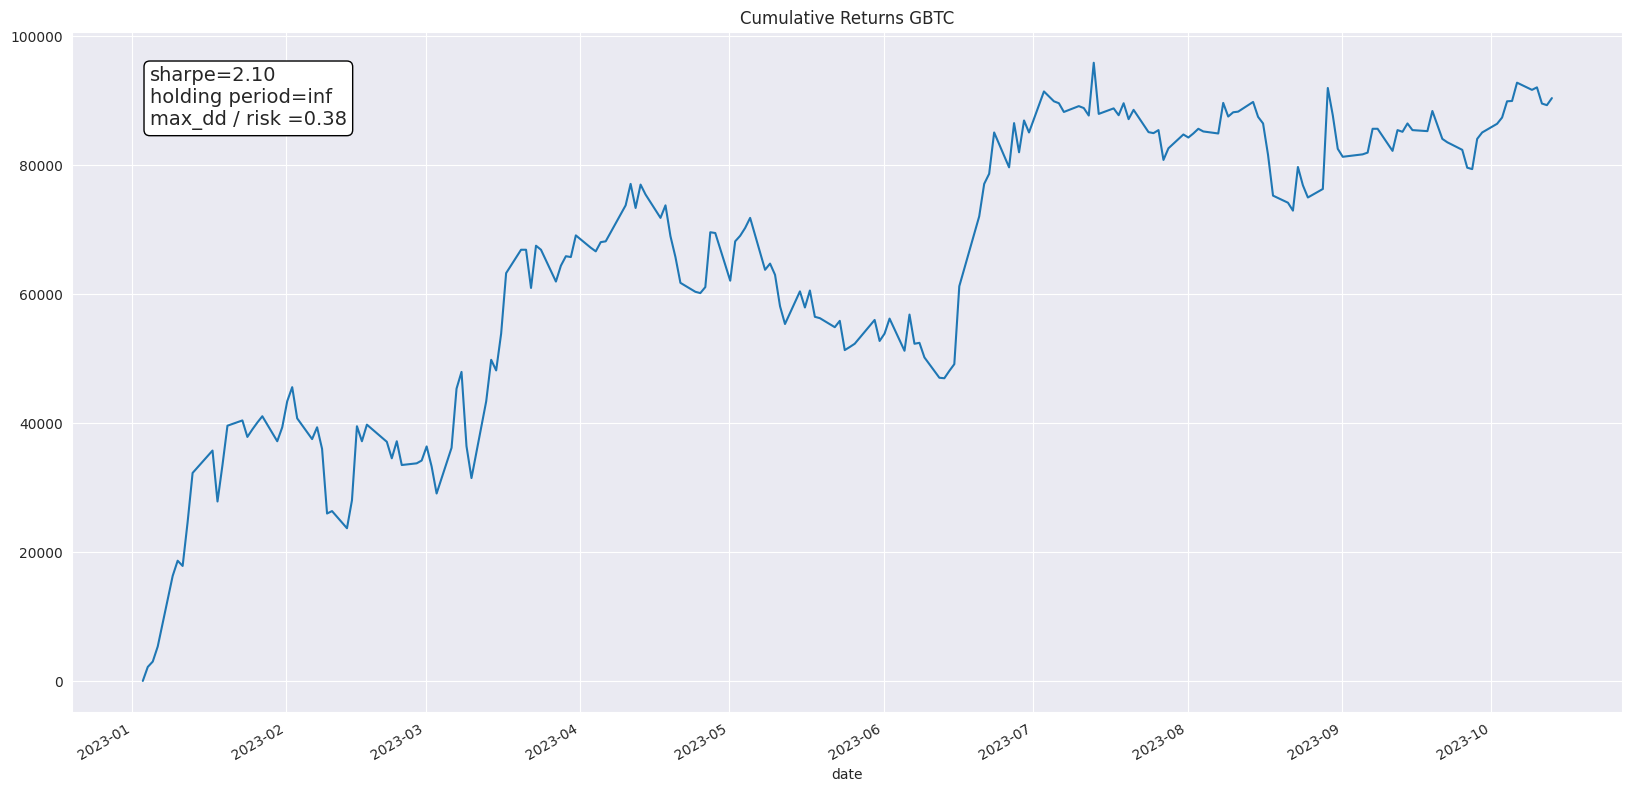

/root/src/crypto-astraea/aaron_research/utils/helpers.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  return 2 * positions.abs().values.sum() / trades.abs().values.sum()


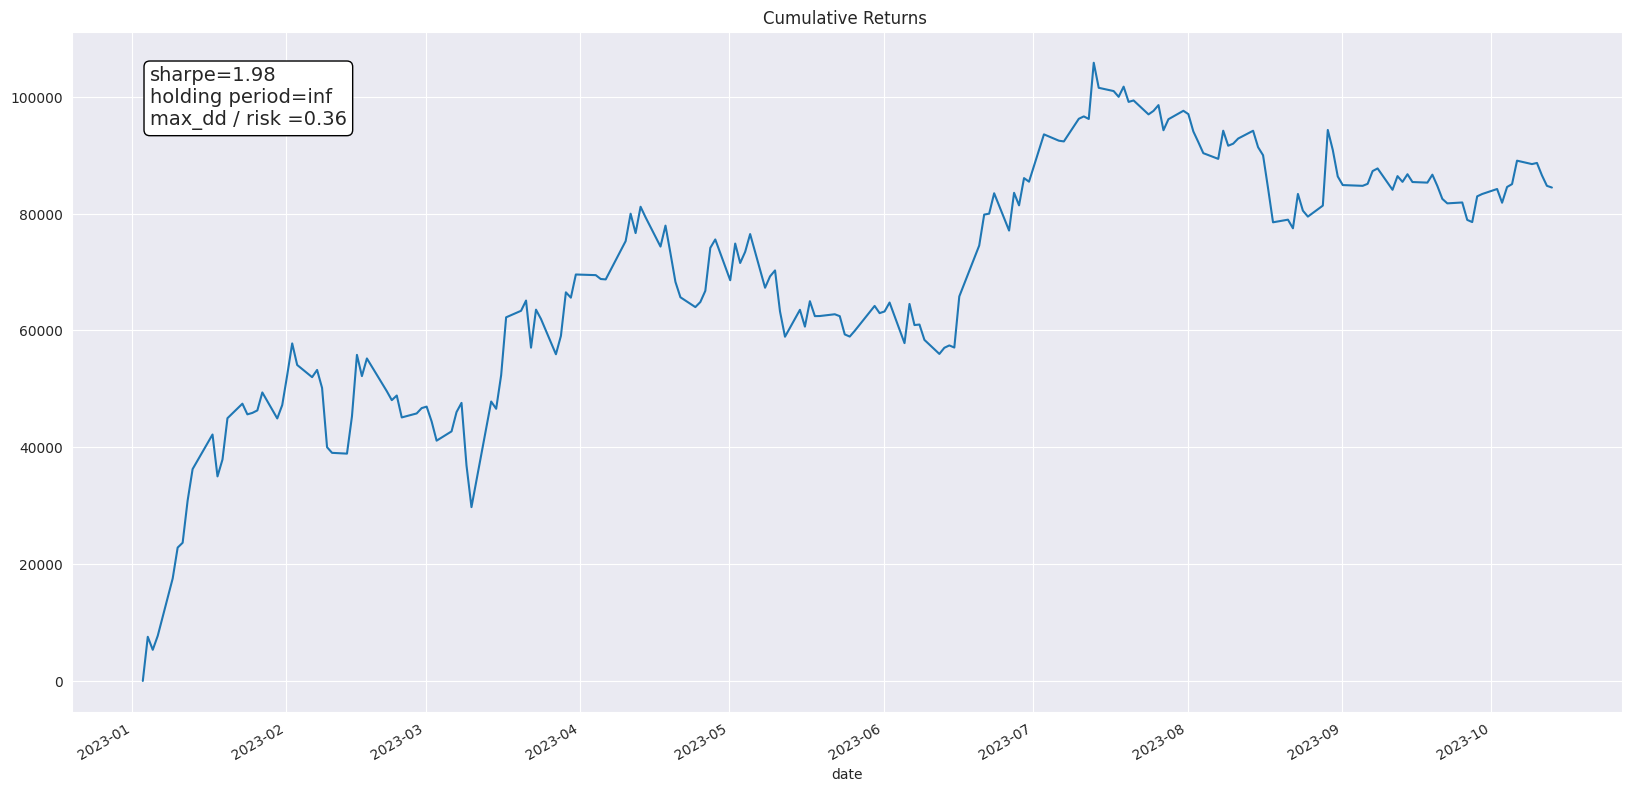

In [33]:
dollars = 1e5
for trade in (mstr, gbtc, 0.5 * (mstr + gbtc)):
    plot_cumulative_returns(pd.Series(1, trade.index), (trade * dollars).fillna(0), trade.name)
    plt.show()